In [12]:
import pandas as pd
from process_datas import get_X_y, scaler_data, encode_names


data = pd.read_csv('data-15 genres-final.csv')
X, y, groups = get_X_y(data)
X = scaler_data(X)
y, _ = encode_names(y)

In [13]:
from classifier import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=15, init='random').fit(X)
y_pred = kmeans.predict(X)

ValueError: init should be either 'k-means++', 'random', a ndarray or a callable, got 'heuristic' instead.

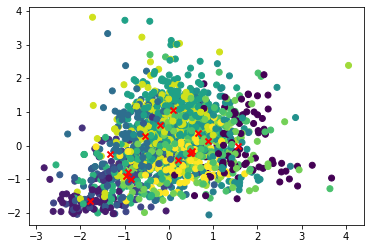

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
c='r', marker='x', linewidths=2)

In [ ]:
import numpy as np
from sklearn import metrics


def clusters_metrics(X, y, y_pred):
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    coef_s = metrics.silhouette_samples(X, y_pred)
    coef_s_mean = metrics.silhouette_score(X, y_pred)
    return homogeneity, completeness, coef_s, coef_s_mean

In [ ]:
def graphics(X, y, y_pred, title):
    homogeneity, completeness, coef_s, coef_s_mean = clusters_metrics(X, y, y_pred)
    
    # K-Means: Configuración de los graficos
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    plt.suptitle(title,
                 fontsize=14, fontweight='bold')

    # Configura el 1er subgrafico.
    ax1.set_title('Silhouette Coefficient for each sample')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (15 + 1) * 10])

    # Configura el 2do subgrafico.
    ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        coef_s_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # Grafica el coeficiente de Silhouette para cada muestra.
    cmap = cm.get_cmap("Spectral")
    y_lower = 10

    for i in range(15):
        ith_s = coef_s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cmap(float(i) / 15)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    # Trazar el coeficiente de silueta medio utilizando la línea discontinua vertical roja.
    ax1.axvline(x=coef_s_mean, color="red", linestyle="--")

    # Para el 2do subgráfico ------------------------------------------------------------------------------------------

    # Grafica las predicciones
    colors = cmap(y_pred.astype(float) / 15)
    ax2.scatter(X[:,0], X[:,1], c=colors)

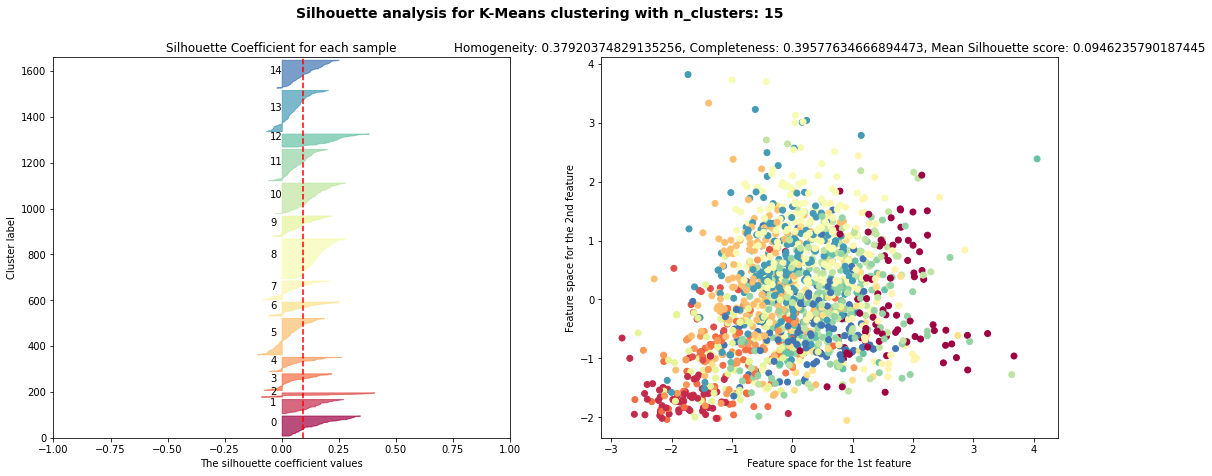

In [ ]:
graphics(X, y, y_pred, 'Silhouette analysis for K-Means clustering with n_clusters: {}'.format(15))

In [ ]:
from sklearn_extra.cluster import KMedoids


kmedoids = KMedoids(n_clusters=15, init='random', random_state=127).fit(X)
y_pred = kmedoids.predict(X)

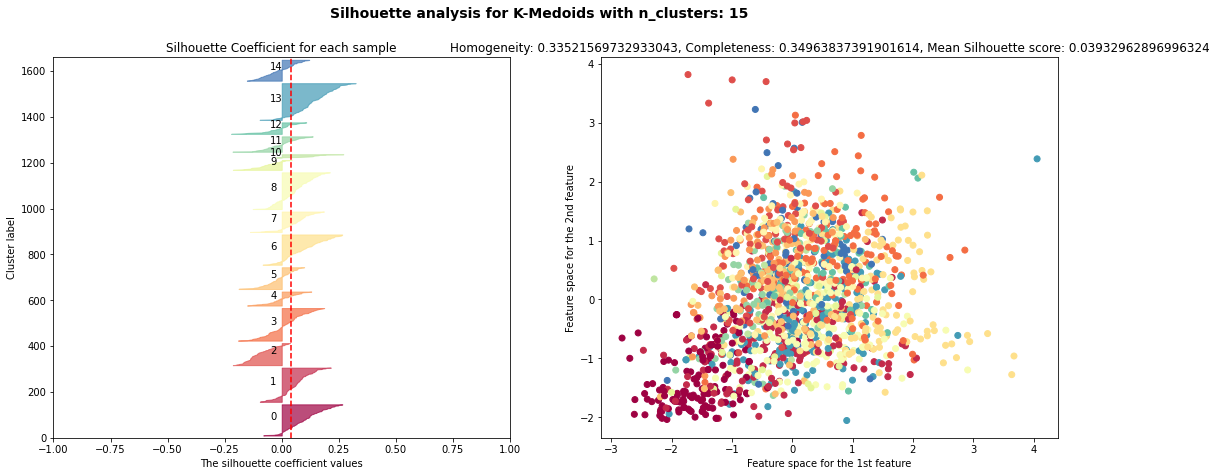

In [ ]:
graphics(X, y, y_pred, 'Silhouette analysis for K-Medoids with n_clusters: {}'.format(15))

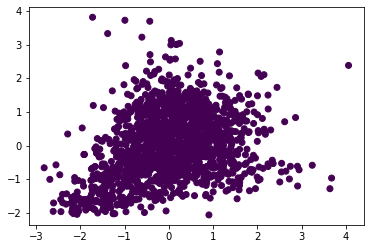

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)

In [ ]:
# Algoritmos extra clases
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, MiniBatchKMeans, MeanShift, OPTICS, SpectralClustering


# Algoritmo Affinity Propagation
model = AffinityPropagation(damping=0.9)
y_pred = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
# graphics(X, y, y_pred, 'Silhouette analysis for Affinity Propagation clustering with n_clusters: {}'.format(15))

KeyboardInterrupt: 

In [ ]:
import pylab
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix


def get_distance_matrix(X):
    # Crear un ranfo minimo y maximo de X
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

    # Obtener la distancia promedio para X
    X1 = (X - x_min) / (x_max - x_min)

    # Matriz de distancias
    # Contiene la distancia de cada punto hacia cualquier otro punto del dataset
    dist_matrix = distance_matrix(X1, X1)
    print(dist_matrix)

    return dist_matrix

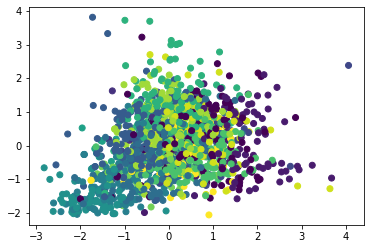

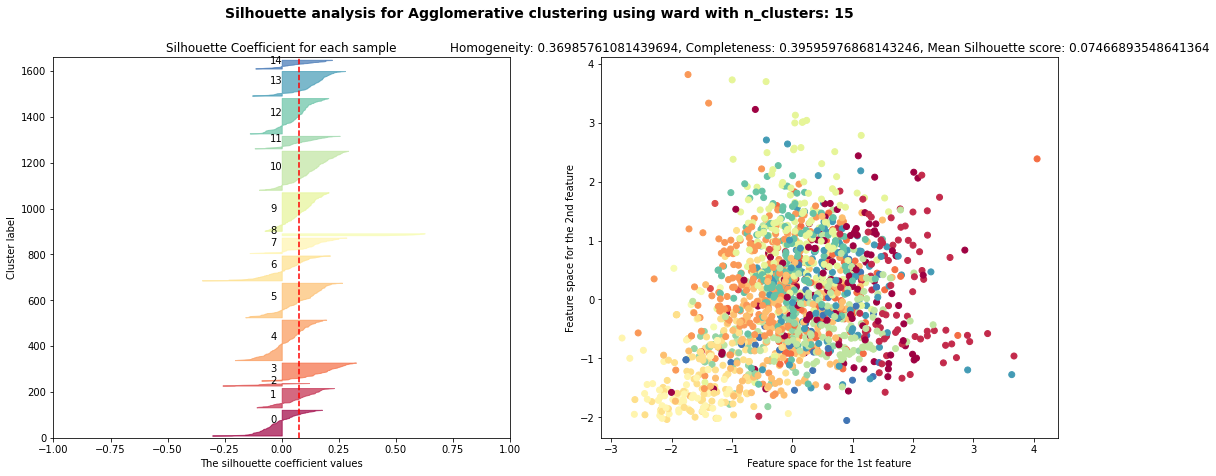

In [ ]:
# Agglomerative Clustering using linkage='ward'
model_w = AgglomerativeClustering(n_clusters=15)
y_pred = model_w.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
graphics(X, y, y_pred, 'Silhouette analysis for Agglomerative clustering using ward with n_clusters: {}'.format(15))

In [ ]:
# Ward
dist_matrix_c = get_distance_matrix(X)
Z = hierarchy.linkage(dist_matrix_c, 'ward') # solo se puede usar con la distancia euclideana
pylab.figure(figsize=(18, 10))
dendro = hierarchy.dendrogram(Z)

[[0.         0.5116991  0.56076058 ... 0.89973968 0.58852068 0.80030599]
 [0.5116991  0.         0.52420632 ... 1.1337527  0.71780036 0.96071118]
 [0.56076058 0.52420632 0.         ... 0.94194347 0.82938074 0.69719836]
 ...
 [0.89973968 1.1337527  0.94194347 ... 0.         0.90228829 0.73445459]
 [0.58852068 0.71780036 0.82938074 ... 0.90228829 0.         0.90570734]
 [0.80030599 0.96071118 0.69719836 ... 0.73445459 0.90570734 0.        ]]


/tmp/ipykernel_27319/4017739544.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix_c, 'ward') # solo se puede usar con la distancia euclideana


Error in callback <function flush_figures at 0x7f310d34e310> (for post_execute):


KeyboardInterrupt: 

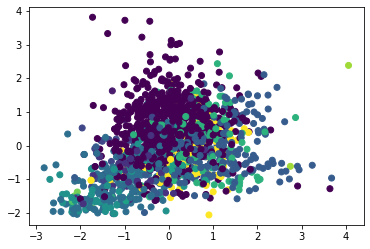

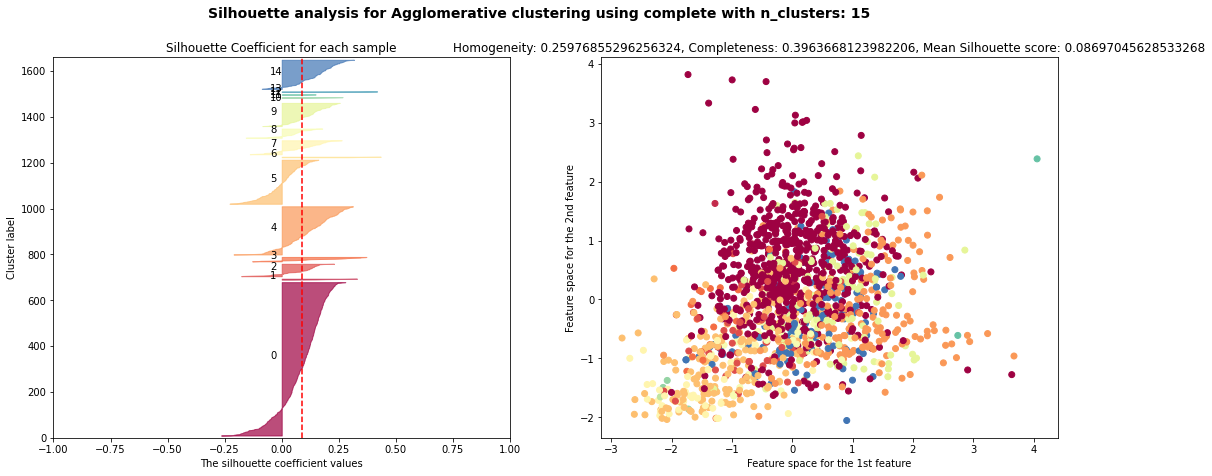

In [ ]:
# Agglomerative Clustering using linkage='complete'
model_c = AgglomerativeClustering(n_clusters=15, linkage='complete')
y_pred = model_c.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
graphics(X, y, y_pred, 'Silhouette analysis for Agglomerative clustering using complete with n_clusters: {}'.format(15))

[[0.         0.5116991  0.56076058 ... 0.89973968 0.58852068 0.80030599]
 [0.5116991  0.         0.52420632 ... 1.1337527  0.71780036 0.96071118]
 [0.56076058 0.52420632 0.         ... 0.94194347 0.82938074 0.69719836]
 ...
 [0.89973968 1.1337527  0.94194347 ... 0.         0.90228829 0.73445459]
 [0.58852068 0.71780036 0.82938074 ... 0.90228829 0.         0.90570734]
 [0.80030599 0.96071118 0.69719836 ... 0.73445459 0.90570734 0.        ]]


/tmp/ipykernel_26107/3357555136.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix_c, 'complete')


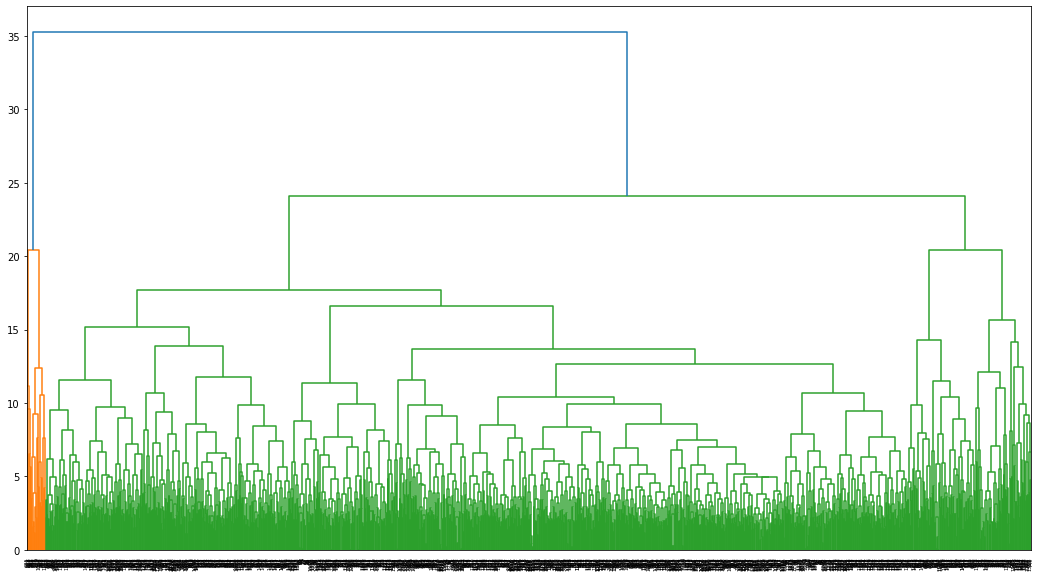

In [ ]:
# Complete
dist_matrix_c = get_distance_matrix(X)
Z = hierarchy.linkage(dist_matrix_c, 'complete')
pylab.figure(figsize=(18, 10))
dendro = hierarchy.dendrogram(Z)

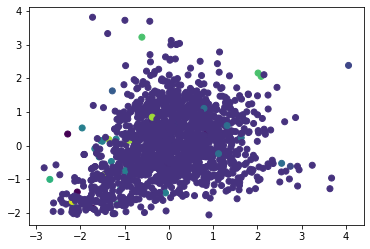

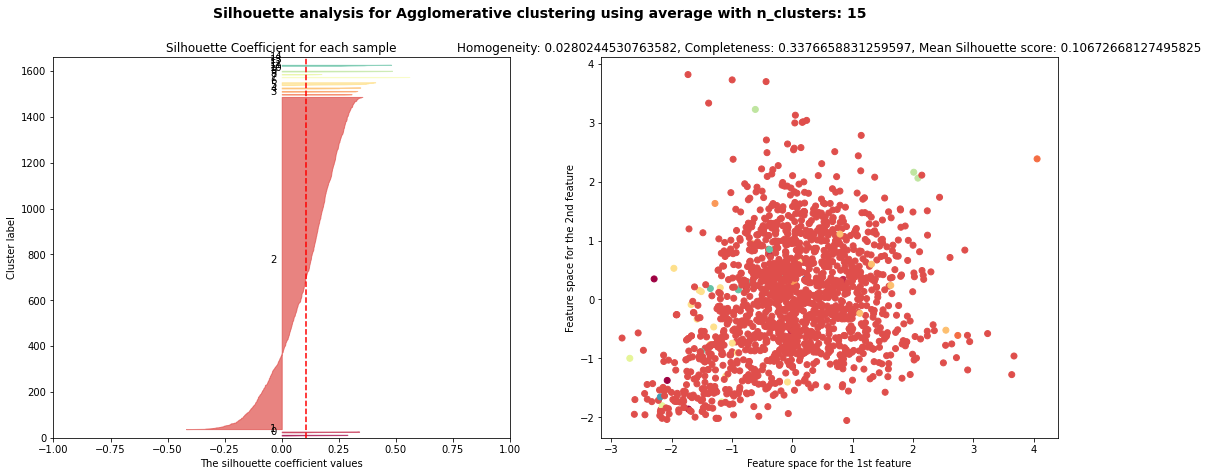

In [ ]:
# Agglomerative Clustering using linkage='average'
model_a = AgglomerativeClustering(n_clusters=15, linkage='average')
y_pred = model_a.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
graphics(X, y, y_pred, 'Silhouette analysis for Agglomerative clustering using average with n_clusters: {}'.format(15))

[[0.         0.5116991  0.56076058 ... 0.89973968 0.58852068 0.80030599]
 [0.5116991  0.         0.52420632 ... 1.1337527  0.71780036 0.96071118]
 [0.56076058 0.52420632 0.         ... 0.94194347 0.82938074 0.69719836]
 ...
 [0.89973968 1.1337527  0.94194347 ... 0.         0.90228829 0.73445459]
 [0.58852068 0.71780036 0.82938074 ... 0.90228829 0.         0.90570734]
 [0.80030599 0.96071118 0.69719836 ... 0.73445459 0.90570734 0.        ]]


/tmp/ipykernel_26107/3743694422.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix_a, 'average')


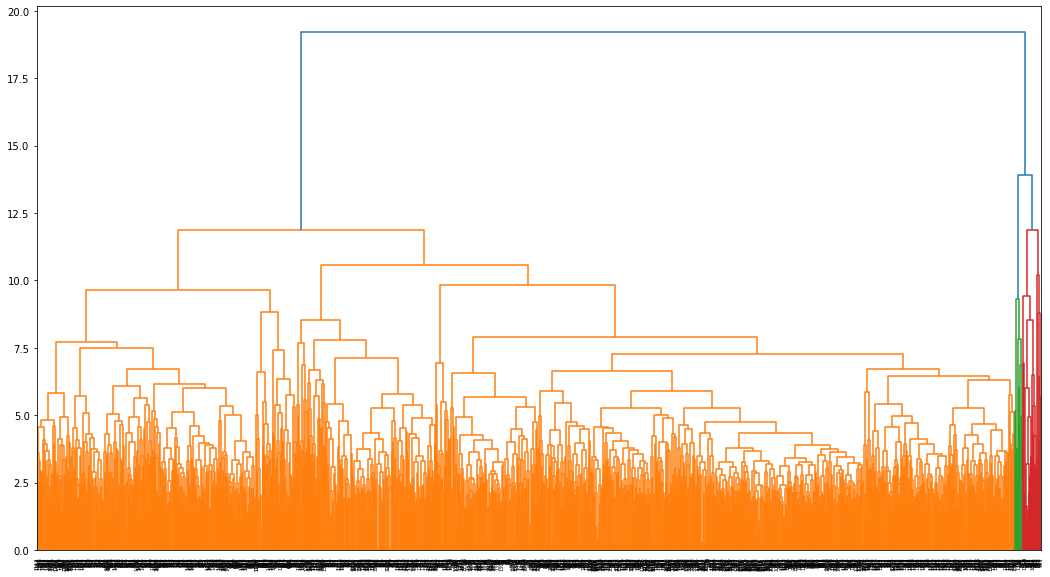

In [ ]:
# Average
dist_matrix_a = get_distance_matrix(X)
Z = hierarchy.linkage(dist_matrix_a, 'average')
pylab.figure(figsize=(18, 10))
dendro = hierarchy.dendrogram(Z)

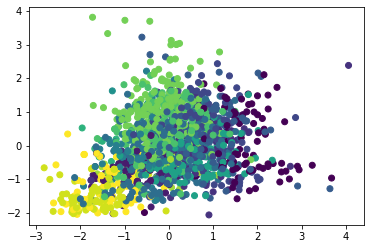

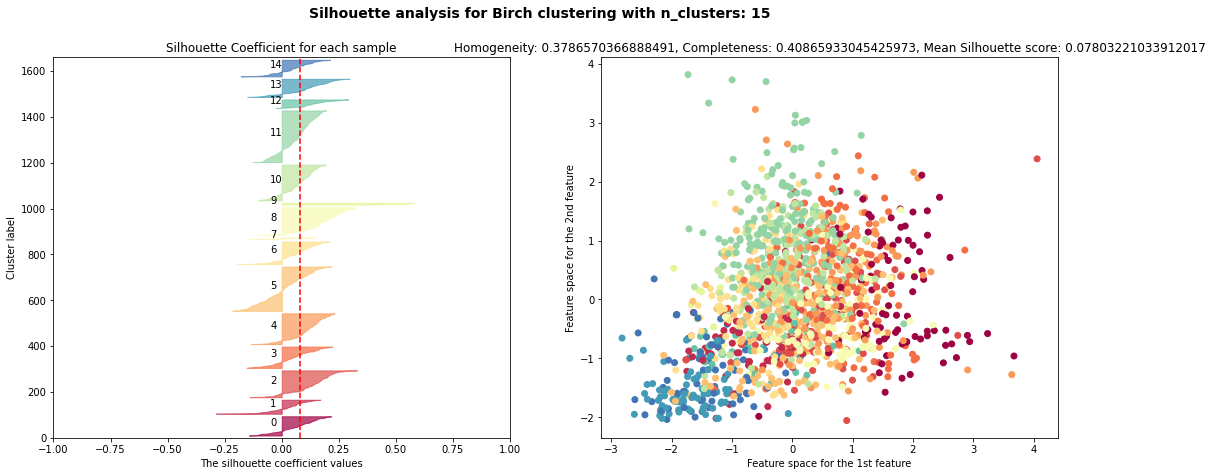

In [ ]:
# Algoritmo BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
model = Birch(threshold=0.01, n_clusters=15)
y_pred = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
graphics(X, y, y_pred, 'Silhouette analysis for Birch clustering with n_clusters: {}'.format(15))

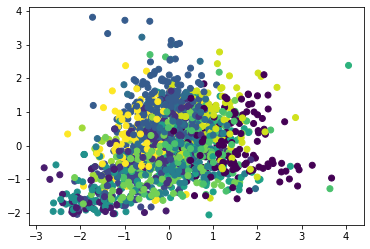

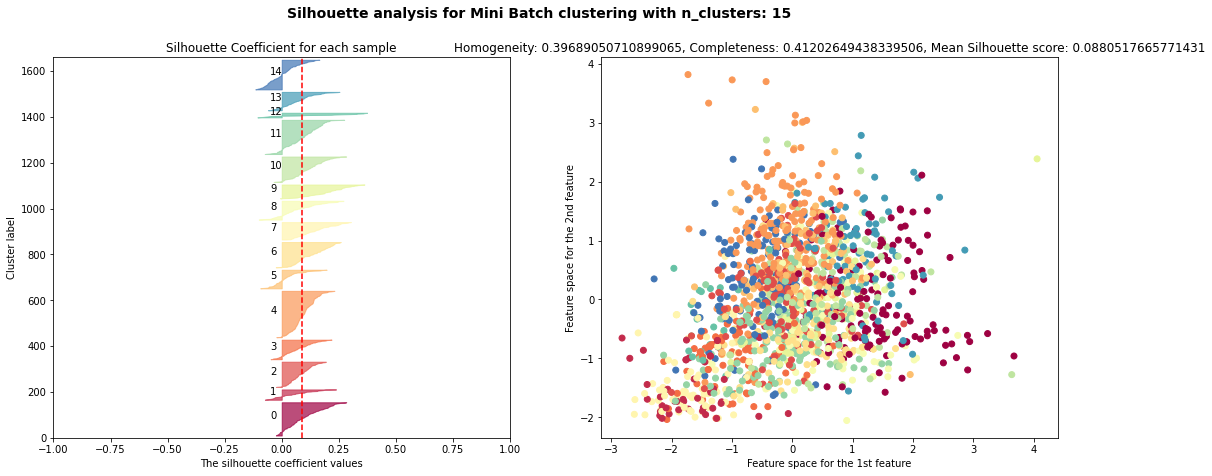

In [ ]:
# Algoritmo Mini Batch K-Means
model = MiniBatchKMeans(n_clusters=15)
y_pred = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
graphics(X, y, y_pred, 'Silhouette analysis for Mini Batch clustering with n_clusters: {}'.format(15))

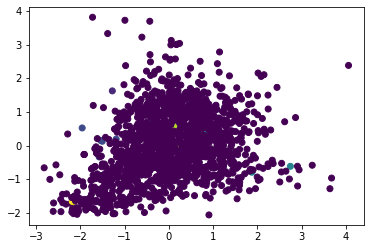

In [ ]:
# 4. Mean Shift
model = MeanShift()
y_pred = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
# graphics(X, y, y_pred, 'Silhouette analysis for Mean Shift clustering with n_clusters: {}'.format(15))

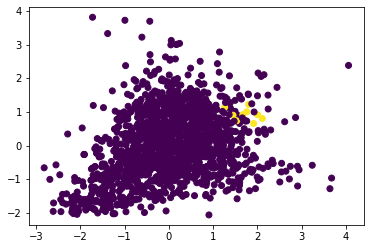

In [ ]:
# 5. OPTICS
model = OPTICS(eps=0.8, min_samples=10)
y_pred = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
# graphics(X, y, y_pred, 'Silhouette analysis for OPTICS clustering with n_clusters: {}'.format(15))

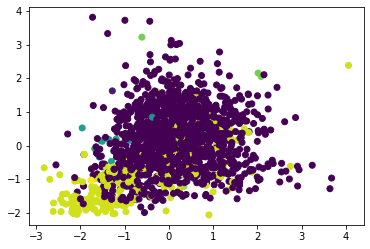

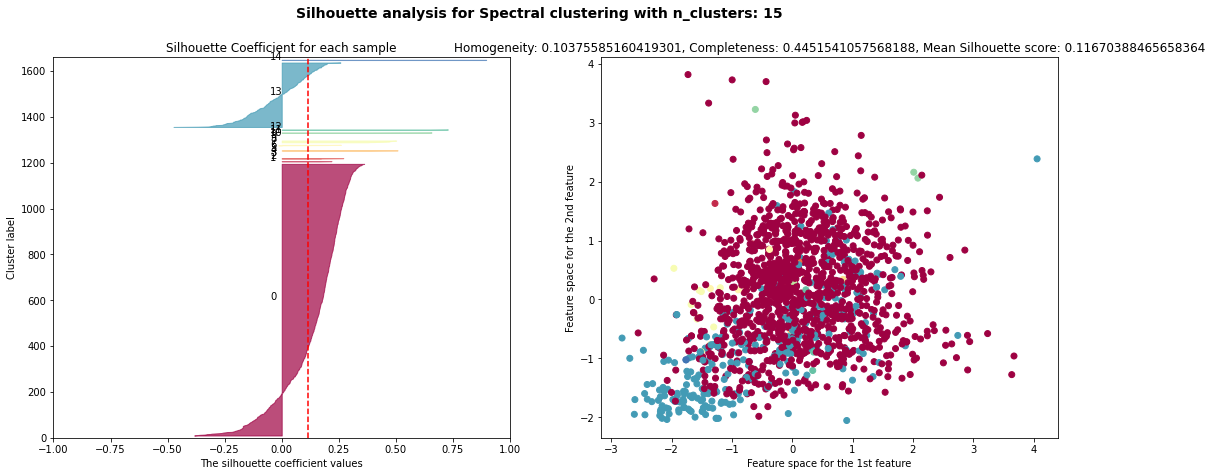

In [ ]:
# 6. Spectral Clustering
model = SpectralClustering(n_clusters=15)
y_pred = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
graphics(X, y, y_pred, 'Silhouette analysis for Spectral clustering with n_clusters: {}'.format(15))